<a href="https://colab.research.google.com/github/Mavivfernanda2/Tomat-Greyscale/blob/main/TOMAT_DONAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

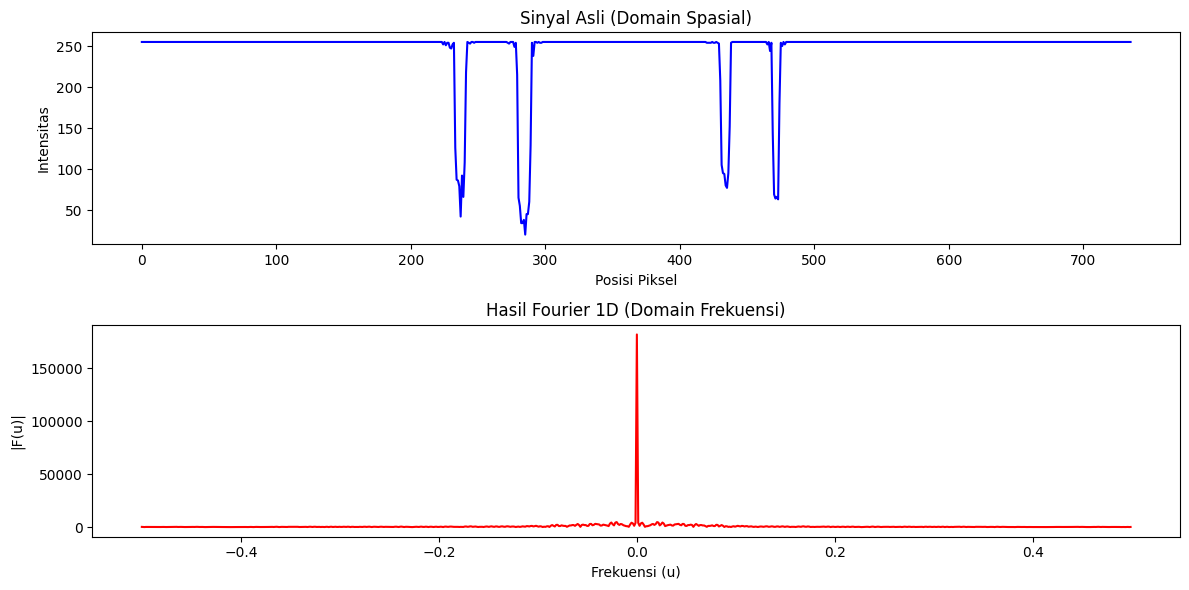

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar berhasil dibaca
if img is None:
    print("Error: Gambar 'tomat.jpg' tidak ditemukan. Pastikan file sudah diunggah di direktori yang sama.")
else:
    # 2. Ambil satu baris (misalnya baris ke-100)
    row = img[100, :]  # sinyal 1D (spasial)

    # 3. Lakukan Fourier Transform 1D
    F = np.fft.fft(row)
    Fshift = np.fft.fftshift(F)

    # 4. Hitung magnitude spectrum
    magnitude = np.abs(Fshift)

    # 5. Buat sumbu frekuensi yang sudah di-shift agar sesuai tampilan
    freq = np.fft.fftshift(np.fft.fftfreq(len(row)))

    # 6. Tampilkan hasil
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(row, color='blue')
    plt.title('Sinyal Asli (Domain Spasial)')
    plt.xlabel('Posisi Piksel')
    plt.ylabel('Intensitas')

    plt.subplot(2, 1, 2)
    plt.plot(freq, magnitude, color='red')
    plt.title('Hasil Fourier 1D (Domain Frekuensi)')
    plt.xlabel('Frekuensi (u)')
    plt.ylabel('|F(u)|')

    plt.tight_layout()
    plt.show()


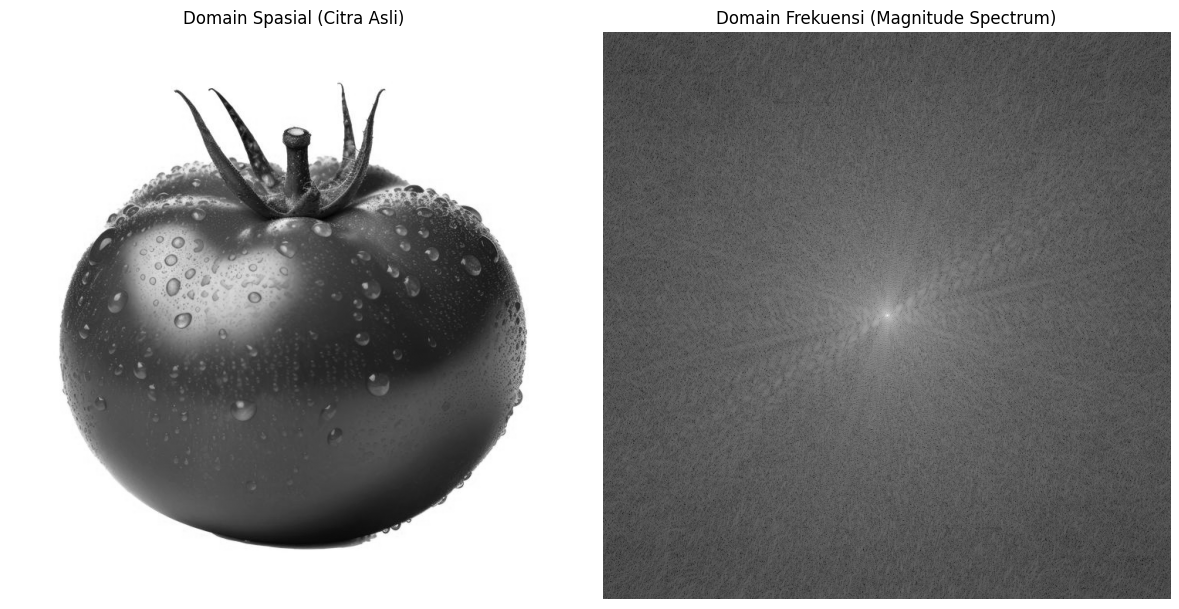

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar berhasil dibaca
if img is None:
    print("Error: Gambar 'tomat.jpg' tidak ditemukan. Pastikan file sudah diunggah di direktori yang sama.")
else:
    # 2. Tampilkan gambar asli (domain spasial)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Domain Spasial (Citra Asli)')
    plt.axis('off')

    # 3. Lakukan Fourier Transform 2D
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)

    # 4. Hitung magnitude spectrum (gunakan log agar kontras lebih jelas)
    magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)  # +1 agar tidak log(0)

    # 5. Tampilkan hasil di domain frekuensi
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Domain Frekuensi (Magnitude Spectrum)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


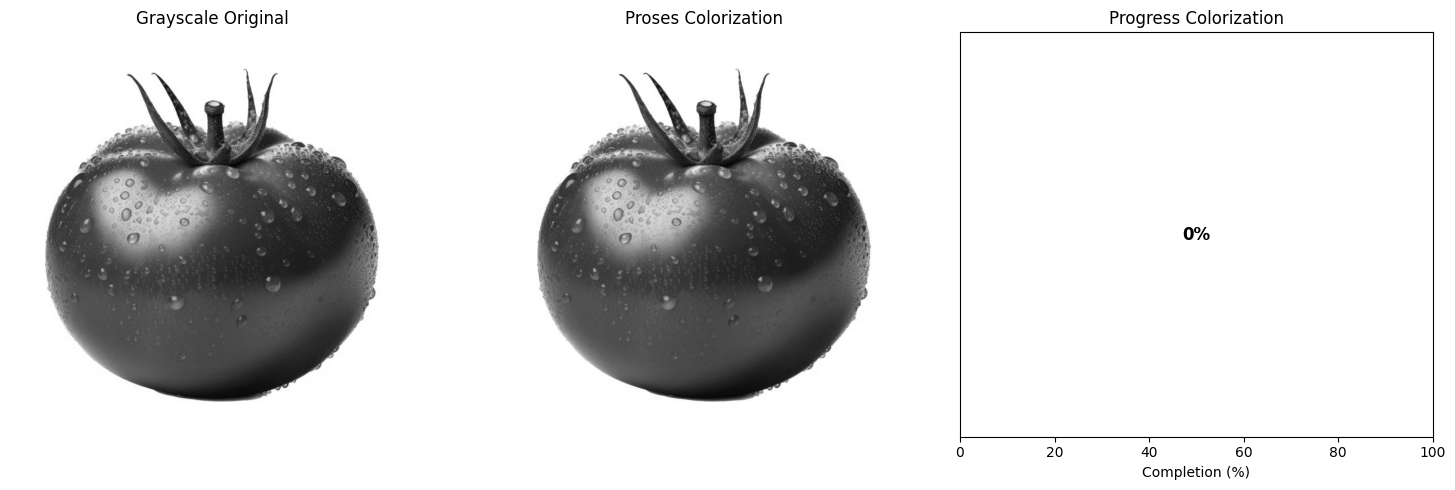

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap
import time

def gradual_color_transition(image_path, duration=5, fps=30):
    """
    Transformasi grayscale ke warna secara bertahap dengan animasi
    """
    # Baca gambar grayscale
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    gray_normalized = gray.astype(np.float32) / 255.0

    # Target colormap (final result)
    target_cmap = plt.get_cmap('viridis')
    target_colored = target_cmap(gray_normalized)

    # Setup figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Tampilkan gambar awal
    im1 = ax1.imshow(gray, cmap='gray')
    ax1.set_title('Grayscale Original')
    ax1.axis('off')

    im2 = ax2.imshow(gray, cmap='gray')
    ax2.set_title('Proses Colorization')
    ax2.axis('off')

    # Progress bar
    progress_bar = ax3.barh(0, 0, color='lightblue')
    ax3.set_xlim(0, 100)
    ax3.set_ylim(-1, 1)
    ax3.set_title('Progress Colorization')
    ax3.set_xlabel('Completion (%)')
    ax3.get_yaxis().set_visible(False)

    # Text progress
    progress_text = ax3.text(50, 0, '0%', ha='center', va='center', fontsize=12, fontweight='bold')

    total_frames = duration * fps
    current_frame = [0]  # Use list untuk mutable reference

    def update(frame):
        # Calculate progress (0 to 1)
        progress = frame / total_frames

        # Interpolasi linear dari grayscale ke warna
        if progress <= 1.0:
            # Buat gambar transisi
            transition_image = np.zeros((*gray.shape, 3))

            # Untuk setiap pixel, interpolasi dari grayscale ke warna target
            for i in range(gray.shape[0]):
                for j in range(gray.shape[1]):
                    gray_val = gray_normalized[i, j]
                    target_color = target_colored[i, j][:3]  # RGB saja, tanpa alpha

                    # Interpolasi linear
                    transition_color = (1 - progress) * gray_val + progress * np.array(target_color)
                    transition_image[i, j] = transition_color

            # Update image
            im2.set_array(transition_image)

            # Update progress bar
            progress_bar[0].set_width(progress * 100)
            progress_text.set_text(f'{progress*100:.1f}%')

            # Change progress bar color based on progress
            if progress < 0.33:
                progress_bar[0].set_color('lightcoral')
            elif progress < 0.66:
                progress_bar[0].set_color('lightyellow')
            else:
                progress_bar[0].set_color('lightgreen')

        current_frame[0] += 1
        return im2, progress_bar, progress_text

    # Create animation
    ani = FuncAnimation(fig, update, frames=total_frames,
                       interval=1000/fps, blit=False, repeat=False)

    plt.tight_layout()
    plt.show()

    # Simpan hasil akhir
    final_result = (target_colored[:, :, :3] * 255).astype(np.uint8)
    cv2.imwrite('hasil_colorization_final.jpg', cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR))

    return final_result

# Contoh penggunaan
result = gradual_color_transition("tomat.jpg", duration=5, fps=30)